In [231]:
import pandas as pd


In [286]:
raw = pd.read_excel('11111111.xlsx')
raw['Ticker'] = raw['Ticker'].str.replace(" US",'');

In [287]:
raw.head()
raw['Date'] = pd.to_datetime(raw['Date'])

In [288]:
raw.head()

,Name,Ticker,Date,Period,Actual,Estimate,Surprise,Description,Sales Estimate
0,3M Co,MMM,2019-10-24 06:30:00,Q3 19,2.58,2.492,3.3,Q3 2019 Earnings Release,NaN
1,3M Co,MMM,2019-07-25 06:30:00,Q2 19,2.20,2.053,7.2,Q2 2019 Earnings Release,NaN
2,Kroger Co/The,KR,2018-06-21 08:01:00,Q1 19,0.73,0.633,15.3,Q1 2019 Earnings Release,NaN
3,3M Co,MMM,2019-01-29 06:30:00,Q4 18,2.31,2.276,1.5,Q4 2018 Earnings Release,NaN
4,3M Co,MMM,2018-10-23 07:30:00,Q3 18,2.58,2.702,-4.5,Q3 2018 Earnings Release,NaN


In [247]:
raw['Period'][0]

'Q3 19 '

In [290]:
mQ119 = raw['Period'] == "Q1 19 "
m2019 = raw['Date'].dt.year == 2019
df1 = raw[mQ119&m2019]
part1 = df1[ ['Ticker', 'Date','Actual', 'Estimate']]

In [279]:
part1.columns

Index(['Name', 'Ticker', 'Date', 'Period', 'Actual', 'Estimate', 'Surprise',
       'Description', 'Sales Estimate', 'isP2'],
      dtype='object')

In [271]:
# part1_names = df1.Name.value_counts().index
# mask_othername = raw['Name'] != part1_names
# df2 = raw[mask_othername]

In [272]:
def Part2(name):
    if name not in part1_names:
        return True
    return False

In [273]:
raw['isP2']=raw['Name'].apply(Part2)
df2 = raw[raw['isP2']]

In [274]:
df2 = df2[df2['Date'].dt.year==2019]

In [291]:
part2 = df2.sort_values('Date').groupby('Name').first()[ ['Ticker', 'Date','Actual', 'Estimate']]

In [296]:
new_df = pd.concat([part1,part2])
new_df.to_csv('EPS.csv',index=False)

In [297]:
EPS = pd.read_csv('EPS.csv',keep_date_col=True)
EPS.head()


,Ticker,Date,Actual,Estimate
0,TEL,2019-01-23 06:00:00,1.29,1.279
1,FFIV,2019-01-23 16:05:00,2.70,2.535
2,VAR,2019-01-23 16:06:00,1.06,1.084
3,RJF,2019-01-23 16:23:00,1.79,1.719
4,SBUX,2019-01-24 16:05:00,0.75,0.649


In [298]:
EPS['Time'] = pd.to_datetime(EPS['Date'] )
EPS['Datedt'] = EPS['Time'].dt.date
EPS.head()
EPS['Date']  = EPS['Date'].str[:10]

In [299]:
SPY = pd.read_csv('SPY.csv')

In [300]:
SPY = pd.read_csv('SPY.csv')
SPY['Date']  = SPY['Date'].str[:10]


SPY['Datedt']= pd.to_datetime(SPY['Date'] ).dt.date
# trading_Dates = SPY['Datedt'].str[:10]
trading_Dates = pd.to_datetime(SPY['Date'] ).dt.date
SPY.set_index('Datedt',inplace=True)


In [301]:

DateNumDict = {date:num for date,num in zip(trading_Dates.values,trading_Dates.index)}
NumDateDict = {num:date for date,num in zip(trading_Dates.values,trading_Dates.index)}

In [302]:
import datetime
def findminus30d(date0):
#     print("date0dt is ",(date0),f"with type({type(date0)})")
    if date0 in DateNumDict.keys():
    
        date0num = DateNumDict[date0]
    elif (date0+datetime.timedelta(days=1)) in DateNumDict.keys():
        print('+1')
        date0num = DateNumDict[(date0+datetime.timedelta(days=1))]
    elif (date0+datetime.timedelta(days=2)) in DateNumDict.keys():
        print('+2')
        date0num = DateNumDict[(date0+datetime.timedelta(days=2))]
    elif (date0-datetime.timedelta(days=1)) in DateNumDict.keys():
        print('-1')
        date0num = DateNumDict[(date0-datetime.timedelta(days=1))]
    else:
        date0num = DateNumDict[(date0-datetime.timedelta(days=2))]
            
    d_30 = NumDateDict[(date0num-30)]
    d30 = NumDateDict[(date0num+30)]
    return d_30
def find30d(date0):
#     print("date0dt is ",(date0),f"with type({type(date0)})")
    if date0 in DateNumDict.keys():
    
        date0num = DateNumDict[date0]
    elif (date0+datetime.timedelta(days=1)) in DateNumDict.keys():
        print('+1')
        date0num = DateNumDict[(date0+datetime.timedelta(days=1))]
    elif (date0+datetime.timedelta(days=2)) in DateNumDict.keys():
        print('+2')
        date0num = DateNumDict[(date0+datetime.timedelta(days=2))]
    elif (date0-datetime.timedelta(days=1)) in DateNumDict.keys():
        print('-1')
        date0num = DateNumDict[(date0-datetime.timedelta(days=1))]
    else:
        date0num = DateNumDict[(date0-datetime.timedelta(days=2))]
    d30 = NumDateDict[(date0num+30)]
    return d30
def count_day(x):
    s = x[0]
    e = x[1]
    return(len(SPY[s:e]))

In [303]:
EPS['date_minus_30'] = EPS['Datedt'].apply(findminus30d)
EPS['date_30'] = EPS['Datedt'].apply(find30d)

+2
+1
+1
+2
+1
+1


In [304]:
EPS['no_days']  = EPS[['date_minus_30','date_30']].apply(count_day,axis=1)

In [305]:
for day in EPS['date_minus_30'].values:
    if day not in trading_Dates.values:
        print('not trading date')

In [306]:
for day in EPS['date_30'].values:
    if day not in trading_Dates.values:
        print('not trading date')
    

In [307]:
EPS.columns

Index(['Ticker', 'Date', 'Actual', 'Estimate', 'Time', 'Datedt',
       'date_minus_30', 'date_30', 'no_days'],
      dtype='object')

In [318]:
EPS[['Ticker',  'Actual', 'Estimate','Time','Date','date_minus_30', 'date_30']].to_csv('EPS_date.csv',index=False)

In [319]:
EPS[['Ticker', 'Actual', 'Estimate', 'Time','Date','date_minus_30', 'date_30']]

,Ticker,Actual,Estimate,Time,Date,date_minus_30,date_30
0,TEL,1.29,1.279,2019-01-23 06:00:00,2019-01-23,2018-12-07,2019-03-07
1,FFIV,2.70,2.535,2019-01-23 16:05:00,2019-01-23,2018-12-07,2019-03-07
2,VAR,1.06,1.084,2019-01-23 16:06:00,2019-01-23,2018-12-07,2019-03-07
3,RJF,1.79,1.719,2019-01-23 16:23:00,2019-01-23,2018-12-07,2019-03-07
4,SBUX,0.75,0.649,2019-01-24 16:05:00,2019-01-24,2018-12-10,2019-03-08
5,APD,1.86,1.869,2019-01-25 06:00:00,2019-01-25,2018-12-11,2019-03-11
6,DHI,0.76,0.781,2019-01-25 06:30:00,2019-01-25,2018-12-11,2019-03-11
7,ROK,2.21,2.006,2019-01-29 07:00:00,2019-01-29,2018-12-13,2019-03-13
8,AAPL,4.18,4.167,2019-01-29 16:30:00,2019-01-29,2018-12-13,2019-03-13
9,HP,-0.10,0.294,2019-01-29 17:09:00,2019-01-29,2018-12-13,2019-03-13


In [321]:
EPS.Date.min()

'2019-01-04'

In [322]:
EPS['surp'] = (EPS['Actual']-EPS['Estimate'])/EPS['Estimate']

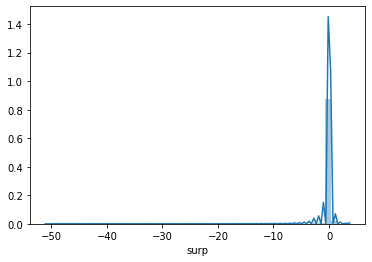

In [326]:
%matplotlib inline
import seaborn as sns
sns.distplot(EPS['surp'])

In [328]:
EPS.describe()

,Actual,Estimate,no_days,surp
count,500.000000,500.000000,500.0,500.000000
mean,8.337980,8.257890,61.0,-0.042647
std,151.446505,151.959465,0.0,2.309797
min,-0.580000,-0.552000,61.0,-51.000000
25%,0.680000,0.658500,61.0,0.002659
50%,1.130000,1.055500,61.0,0.042448
75%,1.840000,1.713750,61.0,0.111111
max,3387.560000,3399.097000,61.0,3.666667
